In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import numpy as np
import os
import sys
from typing import List, Tuple

In [2]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [3]:
from job_scheduler.model import Job, Operation, Schedule, ScheduledJob
from job_scheduler.optimizer import ScheduleOptimizer
from job_scheduler.scheduler import JobScheduler

In [4]:
job_1 = ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)])
job_2 = ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])
job_3 = ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)])
job_4 = ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)])
job_5 = ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])

job_operations = [job_4, job_1, job_5, job_3, job_2]
job_operations

[ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)]),
 ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)]),
 ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)]),
 ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)]),
 ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])]

In [5]:
job_scheduler = JobScheduler(num_of_machines=1, num_ops_per_machine=5, scheduled_jobs=job_operations)
job_scheduler

In [6]:
schedule = job_scheduler.generate_schedule()
schedule

2024-03-20 11:59:48,066 DEBUG 
Processing schedule
2024-03-20 11:59:48,067 DEBUG Processing -> machine: 1, Job: 4, Operation: 1, Elapsed time before processing: 2
2024-03-20 11:59:48,067 DEBUG Parallel Job: 1 -> [('start', 'J411')]
2024-03-20 11:59:48,068 DEBUG Temp Link: {Link(source='start', target='J411', weight=2)}
2024-03-20 11:59:48,068 DEBUG Processing -> machine: 1, Job: 4, Operation: 1, Elapsed time after processing: 0
2024-03-20 11:59:48,068 DEBUG Processing -> machine: 1, Job: 4, Operation: 2, Elapsed time before processing: 4
2024-03-20 11:59:48,068 DEBUG Parallel Job: 2 -> [('start', 'J411'), ('start', 'J412')]
2024-03-20 11:59:48,068 DEBUG Temp Link: {Link(source='start', target='J411', weight=2), Link(source='start', target='J412', weight=4)}
2024-03-20 11:59:48,069 DEBUG Processing -> machine: 1, Job: 4, Operation: 2, Elapsed time after processing: 0
2024-03-20 11:59:48,069 DEBUG Processing -> machine: 1, Job: 1, Operation: 1, Elapsed time before processing: 3
2024-03-2

Schedule(jobs=[Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x10f8a6820>), Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x10f8a4700>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x10f8a4bb0>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x10f8a61f0>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x104293370>)], debug=False)

In [7]:
fig_size = (4, 4)

## Job 4

2024-03-20 11:59:49,502 DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-20 11:59:49,503 DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-20 11:59:49,505 DEBUG findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-20 11:59:49,505 DEBUG findfont: score(FontEntry(fname='/Users/facts/mambaforge/envs/job_scheduler/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-03-20 11:59:49,506 DEBUG findfont: score(FontEntry(fname='/Users/facts/mambaforge/envs/job_scheduler/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-20 11:59:49,506 DEBUG findfont: score(FontEntry(fname='/Users/facts/mambafo

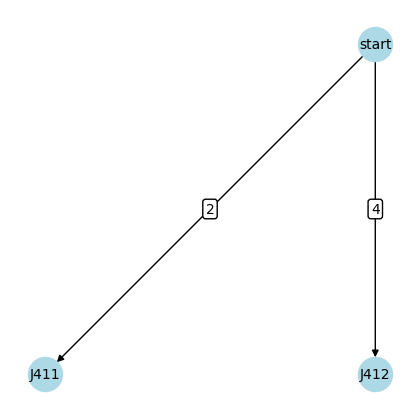

In [8]:
JobScheduler.visualize_schedule(schedule.jobs[0].operations, fig_size)

## Job 1

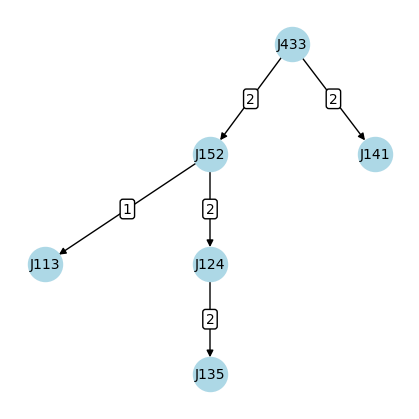

In [78]:
JobScheduler.visualize_schedule(schedule.jobs[1].operations, fig_size)

## Job 5

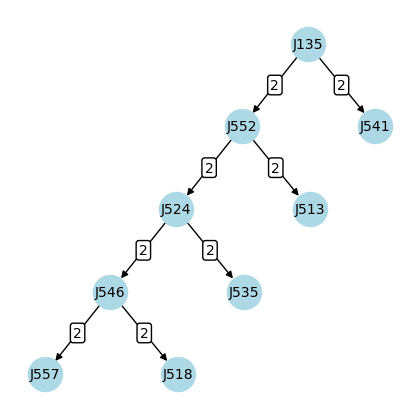

In [79]:
JobScheduler.visualize_schedule(schedule.jobs[2].operations, fig_size)

In [80]:
## Job 3

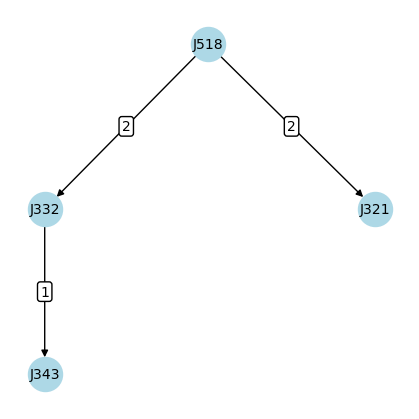

In [81]:
JobScheduler.visualize_schedule(schedule.jobs[3].operations, fig_size)

## Job 2

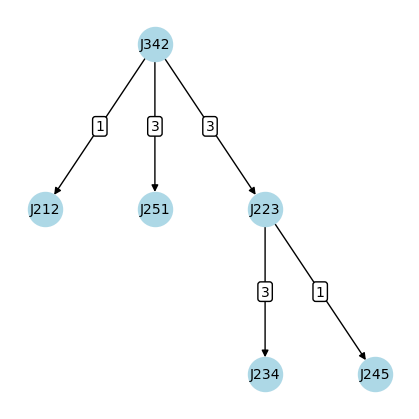

In [69]:
JobScheduler.visualize_schedule(schedule.jobs[4].operations, fig_size)